In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/case_rank.CSV', sep=';')

display(df.head())
display(df.shape)

Date Package Name     Acquisition Channel  Store Listing Visitors  \
0  01/08/2019      B4 Bank                 Organic                    1628   
1  01/08/2019      B4 Bank   Third-party referrers                     514   
2  01/08/2019      B4 Bank                   Other                     113   
3  02/08/2019      B4 Bank                 Organic                    1610   
4  02/08/2019      B4 Bank  Tracked channels (UTM)                      55   

   Installers  Visitor-to-Installer conversion rate  \
0         414                                 0.254   
1          46                                 0.089   
2          23                                 0.204   
3         407                                 0.253   
4          10                                 0.182   

   Installers retained for 1 day  Installer-to-1 day retention rate  \
0                            359                              0.867   
1                             38                              0.826   
2                             17                              0.739   
3                            354                              0.870   
4                             10                              1.000   

   Installers retained for 7 days  Installer-to-7 days retention rate  \
0                             344                               0.831   
1                              35                               0.761   
2                              17                               0.739   
3                             338                               0.830   
4                              10                               1.000   

   Installers retained for 15 days  Installer-to-15 days retention rate  \
0                              335                                0.809   
1                               32                                0.696   
2                               14                                0.609   
3                              330                                0.811   
4                                9                                0.900   

   Installers retained for 30 days  Installer-to-30 days retention rate  
0                              330                                0.797  
1                               30                                0.652  
2                               13                                0.565  
3                              322                                0.791  
4                                8                                0.800

(317, 14)

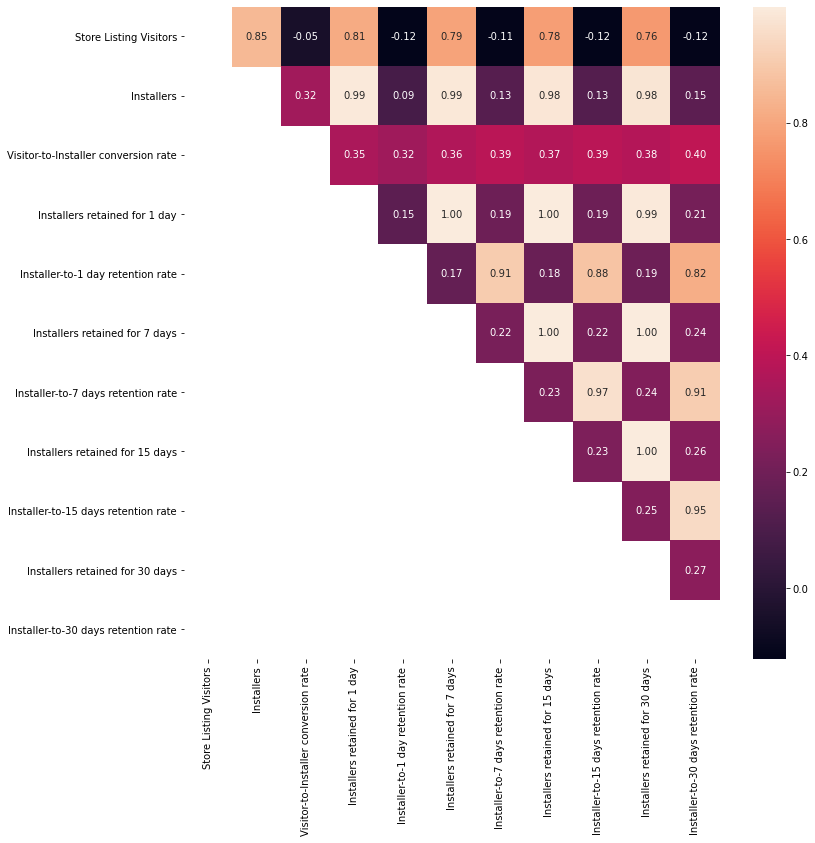

In [3]:
corr_matrix = df.corr()
mask = np.tril(np.ones_like(corr_matrix, dtype=np.bool))

plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, fmt='.2f', annot=True, mask=mask);

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  317 non-null    object 
 1   Package Name                          317 non-null    object 
 2   Acquisition Channel                   317 non-null    object 
 3   Store Listing Visitors                317 non-null    int64  
 4   Installers                            317 non-null    int64  
 5   Visitor-to-Installer conversion rate  317 non-null    float64
 6   Installers retained for 1 day         317 non-null    int64  
 7   Installer-to-1 day retention rate     317 non-null    float64
 8   Installers retained for 7 days        317 non-null    int64  
 9   Installer-to-7 days retention rate    317 non-null    float64
 10  Installers retained for 15 days       317 non-null    int64  
 11  Installer-to-15 day

In [5]:
df.isna().sum()

Date                                    0
Package Name                            0
Acquisition Channel                     0
Store Listing Visitors                  0
Installers                              0
Visitor-to-Installer conversion rate    0
Installers retained for 1 day           0
Installer-to-1 day retention rate       0
Installers retained for 7 days          0
Installer-to-7 days retention rate      0
Installers retained for 15 days         0
Installer-to-15 days retention rate     0
Installers retained for 30 days         0
Installer-to-30 days retention rate     0
dtype: int64

In [6]:
dados_agrupados = df.groupby('Acquisition Channel').mean()

dados_agrupados

Store Listing Visitors  Installers  \
Acquisition Channel                                          
Organic                            2015.750000  369.358696   
Other                                78.025000   14.762500   
Third-party referrers              1402.115385  125.717949   
Tracked channels (UTM)              432.910448    9.582090   

                        Visitor-to-Installer conversion rate  \
Acquisition Channel                                            
Organic                                             0.200804   
Other                                               0.190337   
Third-party referrers                               0.109372   
Tracked channels (UTM)                              0.045851   

                        Installers retained for 1 day  \
Acquisition Channel                                     
Organic                                    327.858696   
Other                                       13.125000   
Third-party referrers                       88.141026   
Tracked channels (UTM)                       7.552239   

                        Installer-to-1 day retention rate  \
Acquisition Channel                                         
Organic                                          0.883989   
Other                                            0.894875   
Third-party referrers                            0.747179   
Tracked channels (UTM)                           0.793373   

                        Installers retained for 7 days  \
Acquisition Channel                                      
Organic                                     313.380435   
Other                                        12.475000   
Third-party referrers                        73.679487   
Tracked channels (UTM)                        6.641791   

                        Installer-to-7 days retention rate  \
Acquisition Channel                                          
Organic                                           0.843630   
Other                                             0.851387   
Third-party referrers                             0.647000   
Tracked channels (UTM)                            0.702657   

                        Installers retained for 15 days  \
Acquisition Channel                                       
Organic                                      305.336957   
Other                                         12.137500   
Third-party referrers                         67.025641   
Tracked channels (UTM)                         6.358209   

                        Installer-to-15 days retention rate  \
Acquisition Channel                                           
Organic                                            0.820978   
Other                                              0.827050   
Third-party referrers                              0.603462   
Tracked channels (UTM)                             0.673388   

                        Installers retained for 30 days  \
Acquisition Channel                                       
Organic                                      296.989130   
Other                                         11.562500   
Third-party referrers                         59.846154   
Tracked channels (UTM)                         5.940299   

                        Installer-to-30 days retention rate  
Acquisition Channel                                          
Organic                                            0.798141  
Other                                              0.789675  
Third-party referrers                              0.555064  
Tracked channels (UTM)                             0.632657

In [7]:
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

In [8]:
linhas = dados_agrupados.index

infos = list()

for i in linhas:
    info = dados_agrupados.loc[[i], ['Installer-to-1 day retention rate', 
                                             'Installer-to-7 days retention rate', 
                                             'Installer-to-15 days retention rate', 
                                             'Installer-to-30 days retention rate']]
    infos.append(info.values[0])

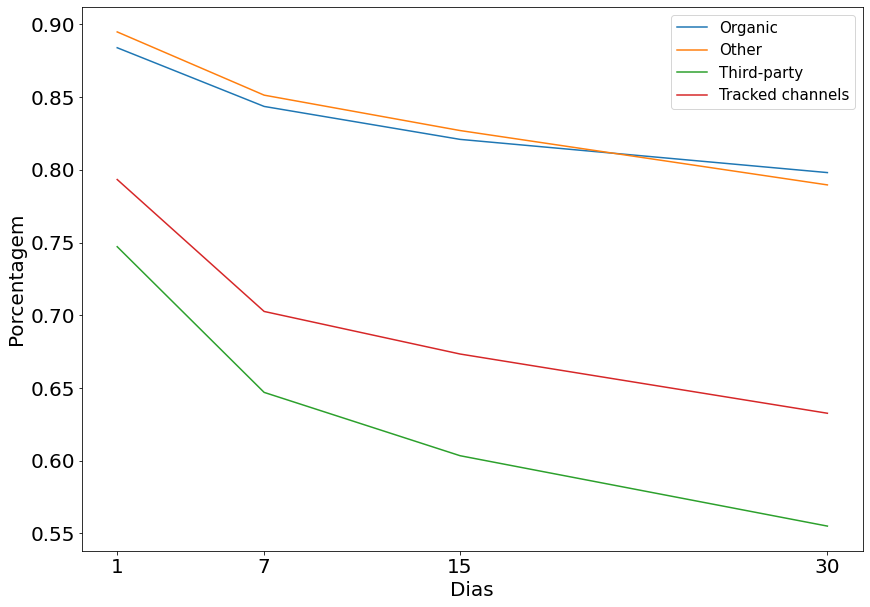

In [9]:
espaco = [1, 7, 15, 30]
labels = [t for t in dados_agrupados.index]

labels[2] = "Third-party"
labels[3] = "Tracked channels"

plt.figure(figsize=(14,10))
for i in range(len(infos)):
    sns.lineplot(x=espaco, y=infos[i], label=labels[i])
plt.xticks([1, 7, 15,30])
plt.xlabel('Dias', size=20)
plt.ylabel('Porcentagem', size=20)
plt.legend(prop={'size': 15});

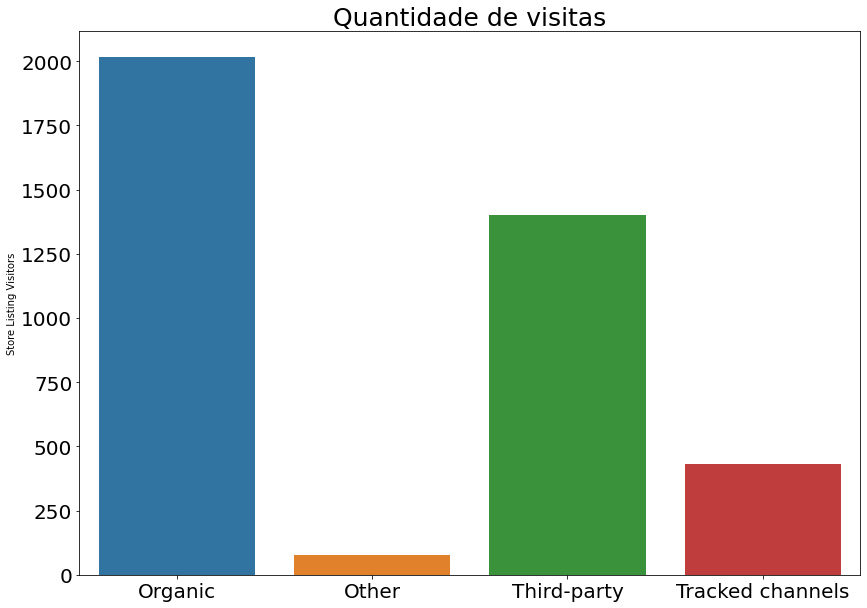

In [10]:
visitantes = dados_agrupados['Store Listing Visitors']
instaladores = dados_agrupados['Installers']

plt.figure(figsize=(14,10))
sns.barplot(x=labels, y=visitantes)
plt.title("Quantidade de visitas", size=25);


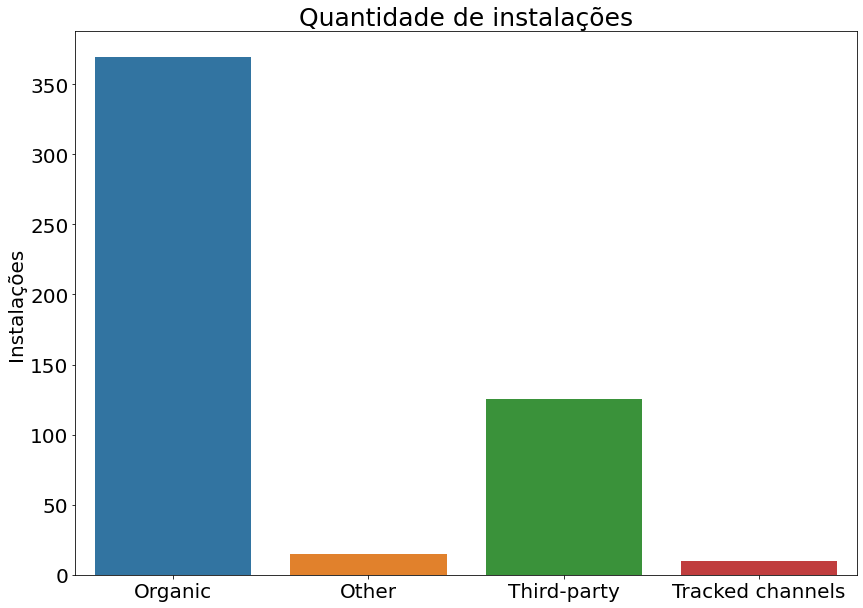

In [11]:
plt.figure(figsize=(14,10))
sns.barplot(x=labels, y=instaladores)
plt.title("Quantidade de instalações", size=25)
plt.ylabel('Instalações', size=20);

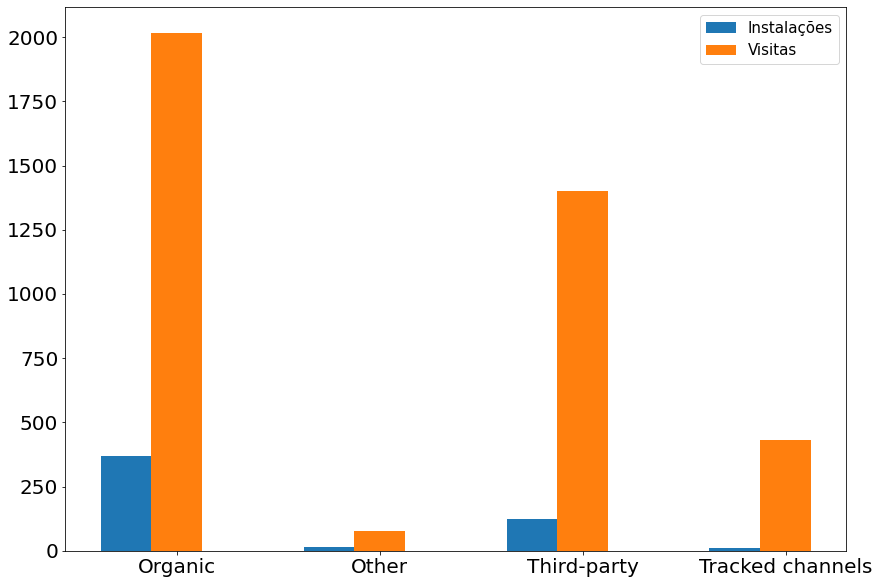

In [12]:
barWidth = 0.25

r1 = np.arange(len(visitantes))
r2 = [x+barWidth for x in r1]

plt.figure(figsize=(14,10))
plt.bar(r1, instaladores, width=barWidth, label='Instalações')
plt.bar(r2, visitantes, width=barWidth, label='Visitas')

plt.xticks([r+barWidth for r in range(len(visitantes))], labels);

plt.legend(prop={'size': 15})
plt.show()

In [13]:
df_organic = df.loc[df["Acquisition Channel"]  == "Organic"]

display(df_organic.head())
display(df_organic.shape)

Date Package Name Acquisition Channel  Store Listing Visitors  \
0   01/08/2019      B4 Bank             Organic                    1628   
3   02/08/2019      B4 Bank             Organic                    1610   
7   03/08/2019      B4 Bank             Organic                    1725   
11  04/08/2019      B4 Bank             Organic                    1579   
15  05/08/2019      B4 Bank             Organic                    1488   

    Installers  Visitor-to-Installer conversion rate  \
0          414                                 0.254   
3          407                                 0.253   
7          401                                 0.232   
11         410                                 0.260   
15         374                                 0.251   

    Installers retained for 1 day  Installer-to-1 day retention rate  \
0                             359                              0.867   
3                             354                              0.870   
7                             360                              0.898   
11                            365                              0.890   
15                            334                              0.893   

    Installers retained for 7 days  Installer-to-7 days retention rate  \
0                              344                               0.831   
3                              338                               0.830   
7                              348                               0.868   
11                             350                               0.854   
15                             323                               0.864   

    Installers retained for 15 days  Installer-to-15 days retention rate  \
0                               335                                0.809   
3                               330                                0.811   
7                               348                                0.868   
11                              341                                0.832   
15                              317                                0.848   

    Installers retained for 30 days  Installer-to-30 days retention rate  
0                               330                                0.797  
3                               322                                0.791  
7                               340                                0.848  
11                              330                                0.805  
15                              303                                0.810

(92, 14)

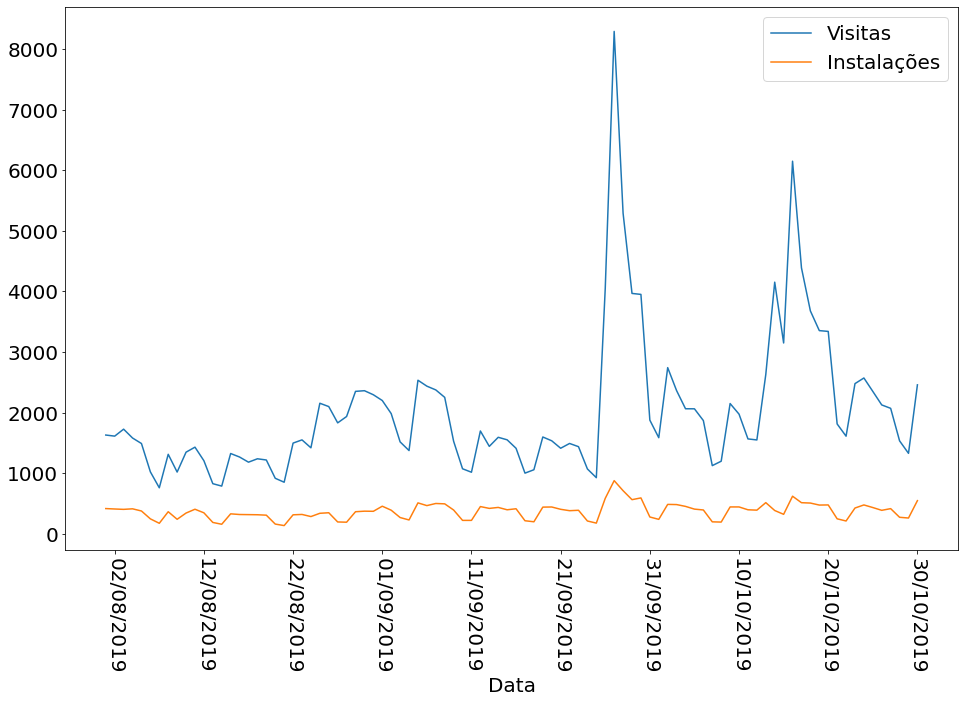

In [14]:
espaco = np.linspace(1, 91, 10)
espaco = [int(i) for i in espaco]
datas = [df_organic["Date"].iloc[i] for i in espaco]

plt.figure(figsize=(16,10))
sns.lineplot(data=df_organic, x='Date', y='Store Listing Visitors', label='Visitas')
sns.lineplot(data=df_organic, x='Date', y='Installers', label='Instalações')
plt.legend(prop={"size": 20})
plt.xlabel('Data', size=20)
plt.ylabel('', size=20)
plt.xticks(datas)
plt.xticks(rotation=-90);

In [15]:
meses = list()

for data in df_organic["Date"]:
    mes = int(data[3:5])
    meses.append(mes)
    
df_organic["Mes"] = meses

df_organic.head()

<ipython-input-15-2f73439521af>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_organic["Mes"] = meses


Date Package Name Acquisition Channel  Store Listing Visitors  \
0   01/08/2019      B4 Bank             Organic                    1628   
3   02/08/2019      B4 Bank             Organic                    1610   
7   03/08/2019      B4 Bank             Organic                    1725   
11  04/08/2019      B4 Bank             Organic                    1579   
15  05/08/2019      B4 Bank             Organic                    1488   

    Installers  Visitor-to-Installer conversion rate  \
0          414                                 0.254   
3          407                                 0.253   
7          401                                 0.232   
11         410                                 0.260   
15         374                                 0.251   

    Installers retained for 1 day  Installer-to-1 day retention rate  \
0                             359                              0.867   
3                             354                              0.870   
7                             360                              0.898   
11                            365                              0.890   
15                            334                              0.893   

    Installers retained for 7 days  Installer-to-7 days retention rate  \
0                              344                               0.831   
3                              338                               0.830   
7                              348                               0.868   
11                             350                               0.854   
15                             323                               0.864   

    Installers retained for 15 days  Installer-to-15 days retention rate  \
0                               335                                0.809   
3                               330                                0.811   
7                               348                                0.868   
11                              341                                0.832   
15                              317                                0.848   

    Installers retained for 30 days  Installer-to-30 days retention rate  Mes  
0                               330                                0.797    8  
3                               322                                0.791    8  
7                               340                                0.848    8  
11                              330                                0.805    8  
15                              303                                0.810    8

In [16]:
df_organic_agrupado_mes = df_organic.groupby("Mes").mean()
df_organic_agrupado_mes = df_organic_agrupado_mes[["Store Listing Visitors", 
                                                   "Installers", 
                                                   "Installers retained for 1 day", 
                                                   "Installers retained for 7 days", 
                                                   "Installers retained for 15 days", 
                                                   "Installers retained for 30 days"]]

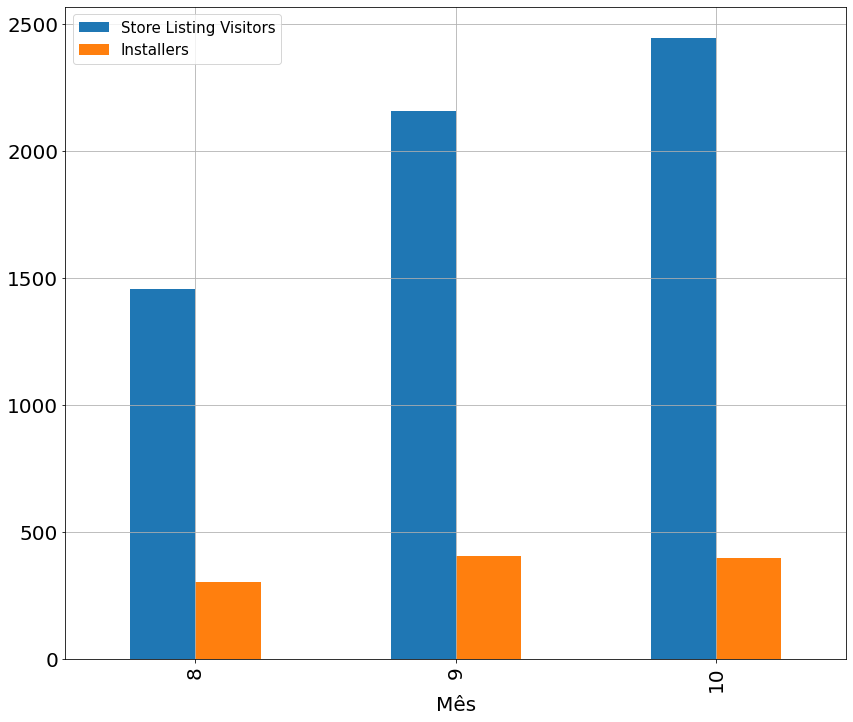

In [17]:
plot_mes = pd.pivot_table(df_organic_agrupado_mes, index='Mes')
plot_mes = plot_mes[["Store Listing Visitors", 
                     "Installers"]]

plot_mes.plot(kind='bar', figsize=(14,12), fontsize=20)
plt.xlabel("Mês", size=20)
plt.grid()
plt.legend(prop={"size": 15});

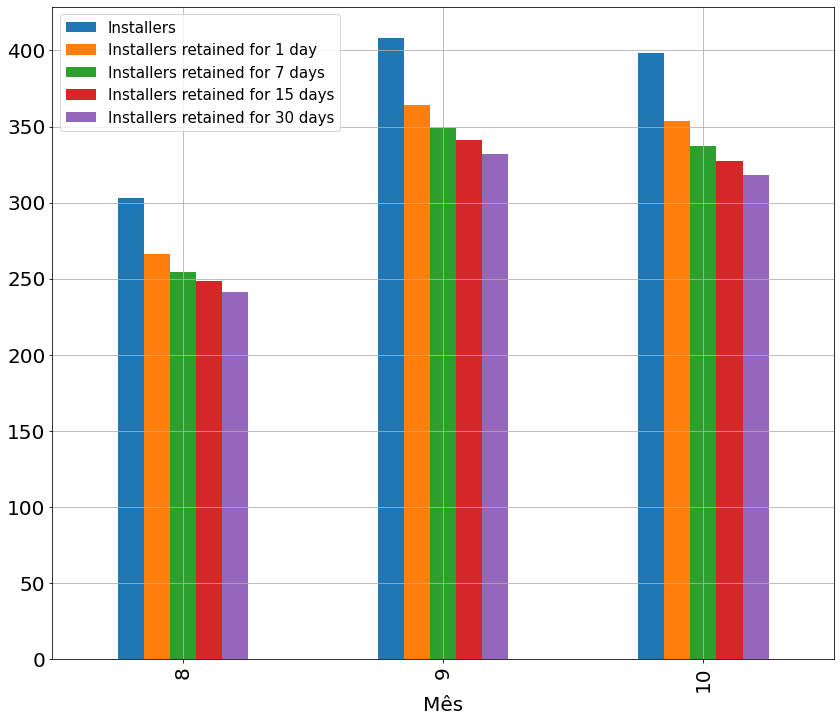

In [18]:
plot_mes = pd.pivot_table(df_organic_agrupado_mes, index='Mes')
plot_mes = plot_mes[["Installers", "Installers retained for 1 day", 
                     "Installers retained for 7 days", 
                     "Installers retained for 15 days", 
                     "Installers retained for 30 days"]]

plot_mes.plot(kind='bar', figsize=(14,12), fontsize=20)
plt.xlabel("Mês", size=20)
plt.grid()
plt.legend(prop={"size": 15});